In [4]:
import numpy as np
import pickle
import pytzer as pz
from matplotlib import pyplot as plt
%matplotlib notebook

with open('pickles/h2so4_prop.pkl','rb') as f:
    crp94,UlnacfPM,UlnacfPM_var,UacfPM,UacfPM_var = pickle.load(f)
    
crp94['lnacfPM_sd'] = np.sqrt(crp94.lnacfPM_unc)

crp94['lnacfPMpp'] = crp94.lnacfPM_new + 2*crp94.lnacfPM_sd
crp94['lnacfPMmm'] = crp94.lnacfPM_new - 2*crp94.lnacfPM_sd

<IPython.core.display.Javascript object>


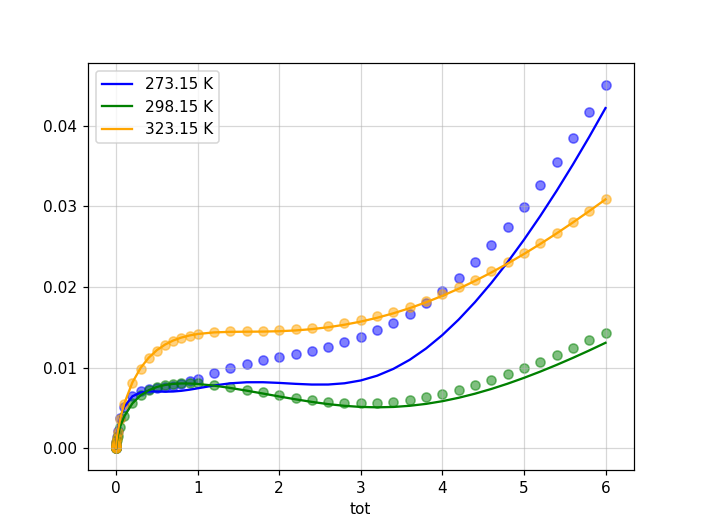

In [5]:
fig,ax = plt.subplots(1,1)

L = crp94.temp == 273.15
crp94[L].plot('tot','lnacfPM_sd', ax=ax, c='b', label='273.15 K')
ax.scatter(crp94.tot[L],np.sqrt(UlnacfPM_var[L]), c='b', alpha=0.5)

L = crp94.temp == 298.15
crp94[L].plot('tot','lnacfPM_sd', ax=ax, c='g', label='298.15 K')
ax.scatter(crp94.tot[L],np.sqrt(UlnacfPM_var[L]), c='g', alpha=0.5)

L = crp94.temp == 323.15
crp94[L].plot('tot','lnacfPM_sd', ax=ax, c='orange', label='323.15 K')
ax.scatter(crp94.tot[L],np.sqrt(UlnacfPM_var[L]), c='orange', alpha=0.5)

ax.grid(alpha=0.5)

<IPython.core.display.Javascript object>


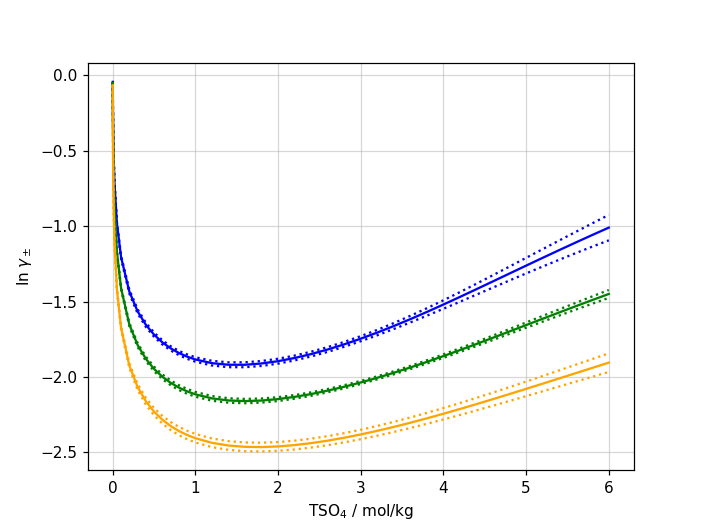

In [6]:
fig,ax = plt.subplots(1,1)

crp94[crp94.temp == 273.15].plot('tot','lnacfPM_new', ax=ax, c='b',
     label='273.15 K')
crp94[crp94.temp == 273.15].plot('tot','lnacfPMpp', ax=ax, c='b', ls=':',
     label='273.15 K')
crp94[crp94.temp == 273.15].plot('tot','lnacfPMmm', ax=ax, c='b', ls=':',
     label='273.15 K')

crp94[crp94.temp == 298.15].plot('tot','lnacfPM_new', ax=ax, c='g',
     label='298.15 K')
crp94[crp94.temp == 298.15].plot('tot','lnacfPMpp', ax=ax, c='g', ls=':',
     label='298.15 K')
crp94[crp94.temp == 298.15].plot('tot','lnacfPMmm', ax=ax, c='g', ls=':',
     label='298.15 K')

crp94[crp94.temp == 323.15].plot('tot','lnacfPM_new', ax=ax, c='orange',
     label='323.15 K')
crp94[crp94.temp == 323.15].plot('tot','lnacfPMpp', ax=ax, c='orange', ls=':',
     label='323.15 K')
crp94[crp94.temp == 323.15].plot('tot','lnacfPMmm', ax=ax, c='orange', ls=':',
     label='323.15 K')

ax.grid(alpha=0.5)
ax.legend_.remove()

ax.set_xlabel('TSO$_4$ / mol/kg')
ax.set_ylabel('ln $\gamma_\pm$');

<IPython.core.display.Javascript object>


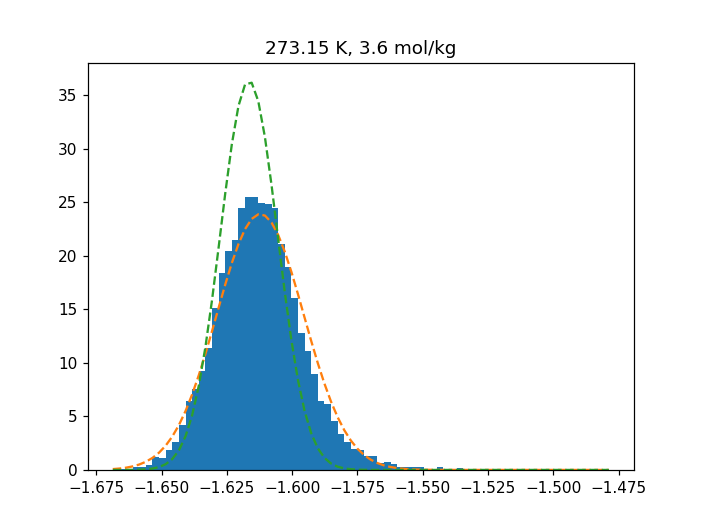

-0.00432695792894
-1.61222435139


In [24]:
fig,ax = plt.subplots(1,1)

rowshow = 75

n,bins,patches = ax.hist(UlnacfPM[rowshow,:], bins=75, normed=True)

sigma = np.sqrt(UlnacfPM_var[rowshow])
mu = np.mean(UlnacfPM[rowshow,:])

sigma2 = crp94.lnacfPM_sd[rowshow]
mu2 = crp94.lnacfPM_new[rowshow]

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

y2 = ((1 / (np.sqrt(2 * np.pi) * sigma2)) *
     np.exp(-0.5 * (1 / sigma2 * (bins - mu2))**2))

ax.plot(bins, y, '--')
ax.plot(bins, y2, '--')

ax.set_title(str(crp94.temp[rowshow]) + ' K, ' + str(crp94.tot[rowshow]) + ' mol/kg')

print(crp94.lnacfPM_new[rowshow]-mu)
print(mu)